# Digital Twin Experiment 👯‍♀️🔋

In [31]:
import pybamm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import liionpack as lp
import pdflatex
import shutil
from sympy.utilities.misc import find_executable
print(find_executable('latex'))



None


## Parameter Setting

In [4]:
# finding default set
pybamm.parameter_sets.Chen2020

{'chemistry': 'lithium_ion',
 'cell': 'LGM50_Chen2020',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '1C_discharge_from_full_Chen2020',
 'sei': 'example',
 'citation': 'Chen2020'}

In [5]:
pybamm.PARAMETER_PATH

['/Users/eirikbaekkelund/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/eirikbaekkelund/Desktop/RePack/EIR_Related/Python/liionpack/Testing PyBaMM',
 '/Users/eirikbaekkelund/opt/anaconda3/lib/python3.9/site-packages/pybamm/input/parameters']

In [6]:
# creates copy folder of all parameters 
#%%bash
#pybamm_edit_parameter lithium_ion

In [7]:
# creates copy of negative electrode parameters and csv file that can be made for tuning the params
#%%bash 
#cp -r lithium_ion/negative_electrodes/graphite_Chen2020/. lithium_ion/negative_electrodes/test_parameters

In [8]:
# we need to tune / have all parameters to define a chemistry, so we can start from a default set
chemistry = pybamm.parameter_sets.Chen2020

In [9]:
# dict with parameter where keys are params and values are read from csv files
chemistry

{'chemistry': 'lithium_ion',
 'cell': 'LGM50_Chen2020',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '1C_discharge_from_full_Chen2020',
 'sei': 'example',
 'citation': 'Chen2020'}

In [10]:
# we can change chemistry by setting to user defined: name.csv - here i named it test_parameters
chemistry['negative electrode'] = 'graphite_Chen2020'

In [11]:
chemistry

{'chemistry': 'lithium_ion',
 'cell': 'LGM50_Chen2020',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '1C_discharge_from_full_Chen2020',
 'sei': 'example',
 'citation': 'Chen2020'}

In [12]:
parameter_values = pybamm.ParameterValues(chemistry = chemistry)

In [13]:
# I changed "Negative electrode charge transfer coefficient" from 0.5 to 0.3
parameter_values['Negative electrode charge transfer coefficient']

0.5

In [14]:
# take the new parameter set to pybamm for others to use by sending it into lithium_ion --> negative_electrodes
#%%bash
#pybamm_add_parameter lithium_ion/negative_electrodes/test_parameters lithium_ion negative_electrodes

* Sent email to creator of youtube tutotrial for PyBaMM to address syntax error

## Battery Pack Experimenting

In [15]:
I_init = 5.0 # initial current
V_init = 4.0  # initial voltage
Ri_init = 5e-2  # internal resistance
R_busbar = 1.5e-3 # busbar resistance
R_connection = 1e-2 # connection resistance
R_terminal = 1e-05 # terminal resistance 
Np = 4 # number of batteries in series
Ns = 1 # number of batteries in parallell
Nbatt = Np * Ns # total number of batteries
netlist = lp.setup_circuit(Np=Np, Ns=Ns, Ri=Ri_init, Rc= R_connection, 
                        Rb=R_busbar, Rt=R_terminal, I=I_init, V=V_init, plot=False, terminals='left')

In [16]:
netlist

,desc,node1,node2,value,node1_x,node1_y,node2_x,node2_y
0,Rbn0,1,2,0.00150,0,0,1,0
1,Rbn1,2,3,0.00150,1,0,2,0
2,Rbn2,3,4,0.00150,2,0,3,0
3,Rc0,5,1,0.01000,0,1,0,0
4,V0,9,5,4.00000,0,2,0,1
5,Ri0,13,9,0.05000,0,3,0,2
6,Rc1,6,2,0.01000,1,1,1,0
7,V1,10,6,4.00000,1,2,1,1
8,Ri1,14,10,0.05000,1,3,1,2
9,Rc2,7,3,0.01000,2,1,2,0


In [17]:
experiment = pybamm.Experiment(
    [
        "Charge at 5 A for 30 minutes",
        "Rest for 15 minutes",
        "Discharge at 5 A for 30 minutes",
        "Rest for 15 minutes",
    ],
    period="10 seconds",
)

In [18]:
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
SPMe = pybamm.models.full_battery_models.lithium_ion.SPMe()


In [19]:
output_variables = [
    "X-averaged negative particle surface concentration [mol.m-3]",
    "X-averaged positive particle surface concentration [mol.m-3]",
]

output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=0.5
)

Stepping simulation: 100%|███████████████████| 541/541 [00:02<00:00, 224.93it/s]


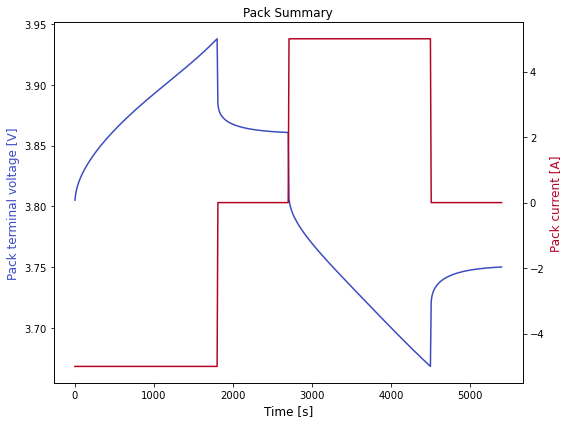

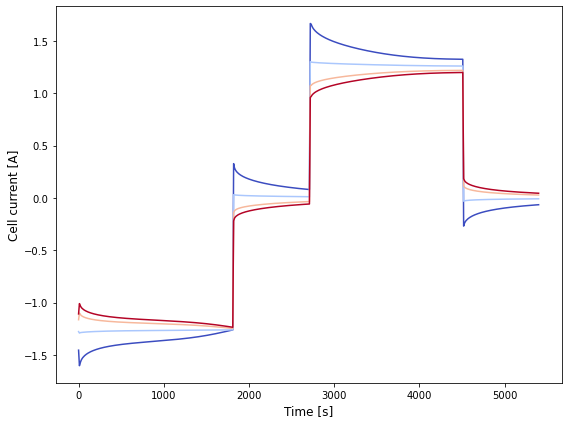

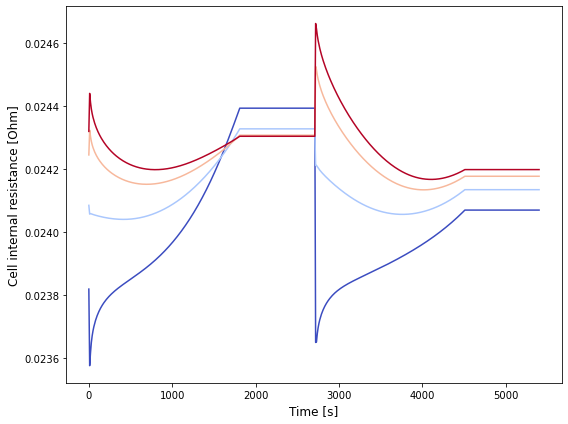

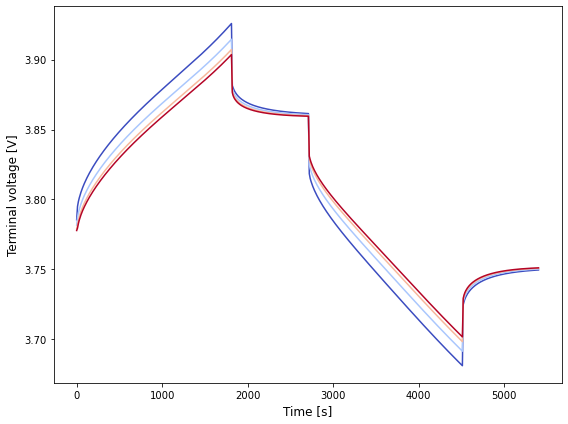

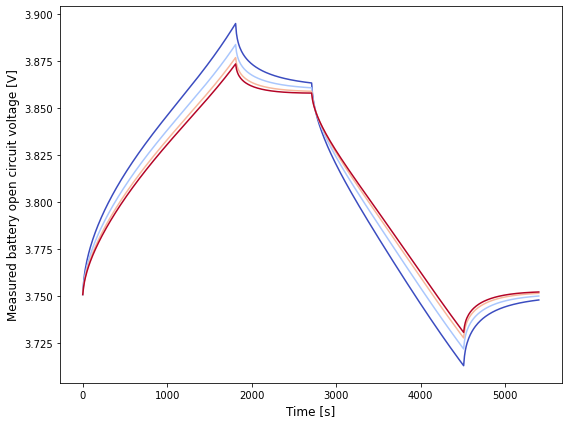

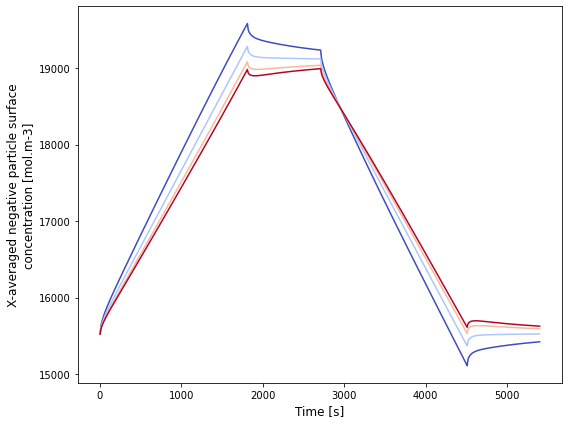

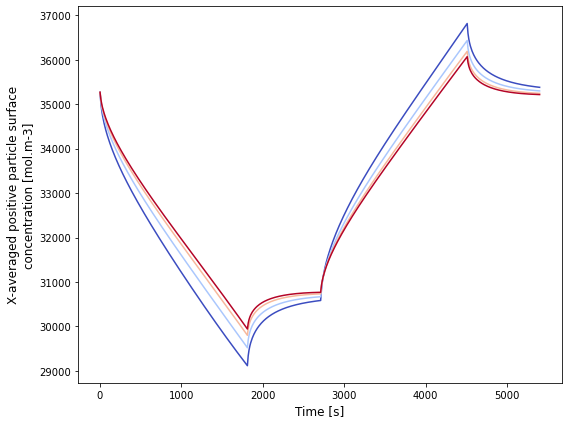

In [20]:
lp.plot_output(output)

### Parameters

In [21]:
parameter_values.search(" ")

1 + dlnf/dlnc	1.0
Ambient temperature [K]	298.15
Bulk solvent concentration [mol.m-3]	2636.0
Cation transference number	0.2594
Cell cooling surface area [m2]	0.00531
Cell volume [m3]	2.42e-05
Current function [A]	Current function [A]
EC diffusivity [m2.s-1]	2e-18
EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrode height [m]	0.065
Electrode width [m]	1.58
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Nyman2008 at 0x7f7a2df89160>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Nyman2008 at 0x7f7a2df890d0>
Initial concentration in electrolyte [mol.m-3]	1000.0
Initial concentration in negative electrode [mol.m-3]	15522.138249037967
Initial concentration in positive electrode [mol.m-3]	35269.54644322063
Initial inner SEI thickness [m]	2.5e-09
Initial outer SEI thickness [m]	2.5e-09
Initial temperature [K]	298.15
Inner SEI electron conductivity [S.m-1]	8.95e-14
Inner SEI lithium interstitial diffusivity [m2.s-1]	1e-20
Inner SEI open-ci

* To change parameter input, it functions the same way as with PyBaMM. 


```
(E.g., this is how we would change the negative particle radius)
```

In [22]:
parameter_values["Positive particle radius [m]"]

5.22e-06

In [23]:
 parameter_values.update({"Positive particle radius [m]": "6e-06"})


In [24]:
parameter_values["Positive particle radius [m]"]

6e-06

In [25]:
# changing it for every battery
print( np.ones(Np*Ns) *6e-6)
inputs = {"Positive particle radius [m]": np.ones(2) *6e-6}
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    inputs = inputs
)
lp.plot_output(output)

[6.e-06 6.e-06 6.e-06 6.e-06]


RuntimeError: .../casadi/core/function_internal.hpp:1257: Input 3 (i3) has mismatching shape. Got 2-by-1. Allowed dimensions, in general, are:
 - The input dimension N-by-M (here 1-by-1)
 - A scalar, i.e. 1-by-1
 - M-by-N if N=1 or M=1 (i.e. a transposed vector)
 - N-by-M1 if K*M1=M for some K (argument repeated horizontally)
 - N-by-P*M, indicating evaluation with multiple arguments (P must be a multiple of 1 for consistency with previous inputs)

## Simulating an Experiment

In [33]:
output_variables = [
    "X-averaged negative particle surface concentration [mol.m-3]",
    "X-averaged positive particle surface concentration [mol.m-3]",
]

# PyBaMM parameters
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)

In [34]:
# Cycling experiment
experiment = pybamm.Experiment(
    [
        (
            "Discharge at 5 A for 1000 s or until 3.3 V",
            "Rest for 1000 s",
            "Charge at 5 A for 1000 s or until 4.1 V",
            "Rest for 1000 s",
        )
    ]
    * 3,
    period="10 s",
)

In [35]:
experiment.operating_conditions

[{'electric': (5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (-5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (-5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (-5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None}]

In [36]:
# Solve pack
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=0.5
)

Stepping simulation: 100%|█████████████████| 1201/1201 [00:05<00:00, 224.88it/s]


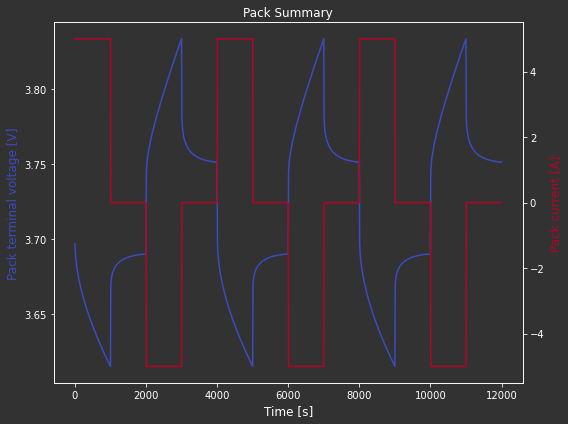

In [37]:
lp.plot_pack(output)
